# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [477]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [478]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [479]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [480]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [481]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [482]:
print(f"What is the shape of df_data? {df_data.shape}")

What is the shape of df_data? (4324, 9)


In [483]:
print(f"How many rows and columns does it have? {df_data.shape[1]}")

How many rows and columns does it have? 9


In [484]:
print(f"What are the column names? {df_data.columns}")

What are the column names? Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [485]:
print(f"Are there any NaN values? {df_data.isna().values.any()}")
print(f"Are there any duplicates? {df_data.duplicated().any()}")

Are there any NaN values? True
Are there any duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [486]:
df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [487]:
print(f"{df_data.isna().any()}")
print(f"The Price column has NaN values.")

Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool
The Price column has NaN values.


In [488]:
counter = df_data[df_data.Price.isna()].index.size
print(f"{counter} NaN values found.")

3360 NaN values found.


# Converting Datatypes

Converting dates to datetime:

In [489]:
dates = pd.to_datetime(df_data.Date, format="mixed", utc=True)
df_data.Date = dates

Converting prices to numeric:

In [490]:
prices = df_data.Price.str.replace(",", "")
df_data.Price = pd.to_numeric(prices)

Creating a Year column to help ploting yearly data:

In [491]:
df_data["Year"] = df_data.Date.apply(lambda x: x.year)

Creating a Launch column to make it easy to sum values:

In [492]:
df_data["Launch"] = 1

## Descriptive Statistics

In [493]:
df_data.describe()

,Price,Year,Launch
count,964.00,"4,324.00","4,324.00"
mean,153.79,"1,987.39",1.00
std,288.45,18.07,0.00
min,5.30,"1,957.00",1.00
25%,40.00,"1,972.00",1.00
50%,62.00,"1,984.00",1.00
75%,164.00,"2,002.00",1.00
max,"5,000.00","2,020.00",1.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [494]:
launches_by_company = pd.DataFrame(df_data.value_counts("Organisation"))[:25]

In [495]:
company_bar = px.bar(
    x=launches_by_company["count"],
    y=launches_by_company.index, 
    orientation="h",
    title="Number of Launches per Company",
    height=800,
    width=1000,
)

company_bar.update_layout(
    title_font_size=24,
    xaxis_title = "Number of Launches",
    xaxis_title_font_size = 18,
    yaxis_title = "Organisation",
    yaxis_title_font_size = 18,
)

company_bar.update_yaxes(
    categoryorder="total ascending"
)
company_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [496]:
active_vs_retired = df_data.value_counts("Rocket_Status")
active_vs_retired.rename({"StatusRetired": "Retired", "StatusActive": "Active"}, inplace=True)

In [497]:
rocket_status_bar = px.bar(
    x=active_vs_retired.index,
    y=active_vs_retired.values, 
    title="Number of Active versus Retired Rockets",
    height=800,
    width=1000,
    color_continuous_scale='Aggrnyl',
    color = active_vs_retired.values
)

rocket_status_bar.update_layout(
    title_font_size=24,
    xaxis_title = "Status",
    xaxis_title_font_size = 18,
    yaxis_title = "Count",
    yaxis_title_font_size = 18,
    coloraxis_showscale=False,
)

rocket_status_bar.update_yaxes(
    categoryorder="total ascending"
)
rocket_status_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [498]:
mission_status = df_data.value_counts("Mission_Status")

In [499]:
mission_status_bar = px.bar(
    x=mission_status.index,
    y=mission_status.values, 
    title="Mission Status",
    height=800,
    width=1000,
    color_continuous_scale='Aggrnyl',
    color = mission_status.values,
    log_y=True
)

mission_status_bar.update_traces(hovertemplate=None)
mission_status_bar.update_layout(
    title_font_size=24,
    xaxis_title = "Status",
    xaxis_title_font_size = 18,
    yaxis_title = "Count",
    yaxis_title_font_size = 18,
    coloraxis_showscale=False, 
    hovermode="y unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),

)

mission_status_bar.update_yaxes(
    categoryorder="total ascending",
)
mission_status_bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [500]:
price_df = df_data.dropna().copy()
price_df.sort_values(by="Price", inplace=True)

In [501]:
price_hist = px.histogram(
    price_df, 
    x="Price", 
    title="Price of Launches",
    nbins=20, 
    log_y=True,
    height=800,
    width=1000,
)
price_hist.update_layout(bargap=0.2)

price_hist.update_layout(
    title_font_size=24,
    xaxis_title = "Price (USD millions)",
    xaxis_title_font_size = 18,
    yaxis_title = "Count",
    yaxis_title_font_size = 18,
    ),

price_hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [502]:
# Get Country info
country = df_data.Location.astype(str).str.split(",").str[-1].str.strip()

Change country names to match names in the iso3166 package:

In [503]:
country[country == "Iran"] = "Iran, Islamic Republic of"

In [504]:
country[country == "North Korea"] = "Korea, Democratic People's Republic of"

In [505]:
country[country == "South Korea"] = "Korea, Republic of"

Replacing "Russia" with "Russian Federation"

In [506]:
country.loc[country == "Russia"] = "Russian Federation"

New Mexico should be USA

In [507]:
country.loc[country == "New Mexico"] = "USA"

Yellow Sea refers to China

In [508]:
query_index = df_data.loc[df_data.Location.str.contains("Yellow Sea")].index
country[query_index] = "China"

Shahrud Missile Test Site should be Iran

In [509]:
query_index =df_data.loc[df_data.Location.str.contains("Shahrud Missile")].index
country[query_index] = "Iran, Islamic Republic of"

Pacific Missile Range Facility should be USA

In [510]:
query_index = df_data.loc[df_data.Location.str.contains("Pacific Missile")].index
country[query_index] = "USA"

In [511]:
query_index = df_data.loc[df_data.Location.str.contains("Pacific Ocean")].index
country[query_index] = "USA"

Barents Sea should be Russian Federation

In [512]:
query_index = df_data.loc[df_data.Location.str.contains("Barents Sea")].index
country[query_index] = "Russian Federation"

Gran Canaria should be USA

In [513]:
query_index = df_data.loc[df_data.Location.str.contains("Gran Canaria")].index
country[query_index] = "USA"

Create Country Column

In [514]:
df_data["Country"] = country

Create Iso_code column:

In [515]:
df_data["Iso_code"]  = df_data.Country.apply(func=lambda x: countries.get(x).alpha3)

In [516]:
launch_by_country = df_data.groupby(["Country", "Iso_code"], as_index=False).agg({"Date": pd.Series.count})
launch_by_country.rename(columns={"Date": "total_launches"}, inplace=True)

In [517]:
fig = px.choropleth(launch_by_country, locations="Iso_code",
                    color="total_launches",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.matter,
                    height=900,
                    width=1000,
                    title="Number of Launches by Country"
                   )
fig.update_layout(
    coloraxis_showscale = False
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [518]:
failures_by_country = df_data[df_data.Mission_Status == "Failure"].groupby(["Country", "Iso_code"], as_index=False).agg({"Date": pd.Series.count})
failures_by_country.rename(columns={"Date": "number_failures"}, inplace=True)

In [519]:
fig = px.choropleth(failures_by_country, locations="Iso_code",
                    color="number_failures",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.amp,
                    height=900,
                    width=1000,
                    title="Number of Failures by Country"
                   )

fig.update_layout(
    coloraxis_showscale = False
)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [520]:
country_org_status = df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Date": pd.Series.count})
country_org_status.rename(columns={"Date": "Launches"}, inplace=True)

In [521]:
fig = px.sunburst(
    country_org_status,
    path=["Country", "Organisation", "Mission_Status"],
    values="Launches",
    title="Luanches Sunburst Chart",
    height=900,
    width=1000
                 )

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [522]:
clear_df = df_data.dropna().copy()
org_total = clear_df.groupby("Organisation").agg({"Price": pd.Series.sum})
org_total.sort_values("Price", inplace=True)

In [523]:
fig = px.bar(
    org_total,
    x=org_total.index,
    y="Price",
    log_y=True,
    height=900,
    width=1000,
    title="Total Amount of Money Spent by Organisation",
    color_continuous_scale='Teal',
    color = "Price",
)
fig.update_layout(
    title_font_size=24,
    yaxis_title = "Total Amount (USD millions)",
    xaxis_title_font_size = 18,
    xaxis_title = "Organisation",
    yaxis_title_font_size = 18,
    )

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [524]:
price_per_launch = clear_df.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum, "Date": pd.Series.count})
price_per_launch["Price_per_Launch"] = price_per_launch.Price / price_per_launch.Date
price_per_launch.sort_values("Price_per_Launch", inplace=True)

In [525]:
fig = px.bar(
    price_per_launch,
    x="Organisation",
    y="Price_per_Launch",
    log_y=True,
    title="Money Spent per Launch",
    color="Organisation",
    height=900,
    width=1000
)
fig.update_layout(
    title_font_size=24,
    yaxis_title = "Total Amount per Launch (USD millions)",
    xaxis_title_font_size = 18,
    xaxis_title = "Organisation",
    yaxis_title_font_size = 18,
)
fig.show()

# Chart the Number of Launches per Year

In [526]:
launches_per_year = df_data.groupby("Year").count().Date

In [527]:
fig = px.line(
    launches_per_year,
    x=launches_per_year.index,
    y=launches_per_year.values,
    title="Number of Launches per Year",
    height=900,
    width=1100,
    markers=True
)
fig.update_layout(
    title_font_size=24,
    xaxis_title = "Year",
    xaxis_title_font_size = 18,
    yaxis_title = "Launches",
    yaxis_title_font_size = 18,
)
fig.update_xaxes(range=[1957, 2020])
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [528]:
# Calculating rolling average to smooth data 
df_launches_monthly = df_data[["Date", "Launch"]].resample("ME", on="Date").count()
roll_df = df_launches_monthly.rolling(window=6).sum()

In [529]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

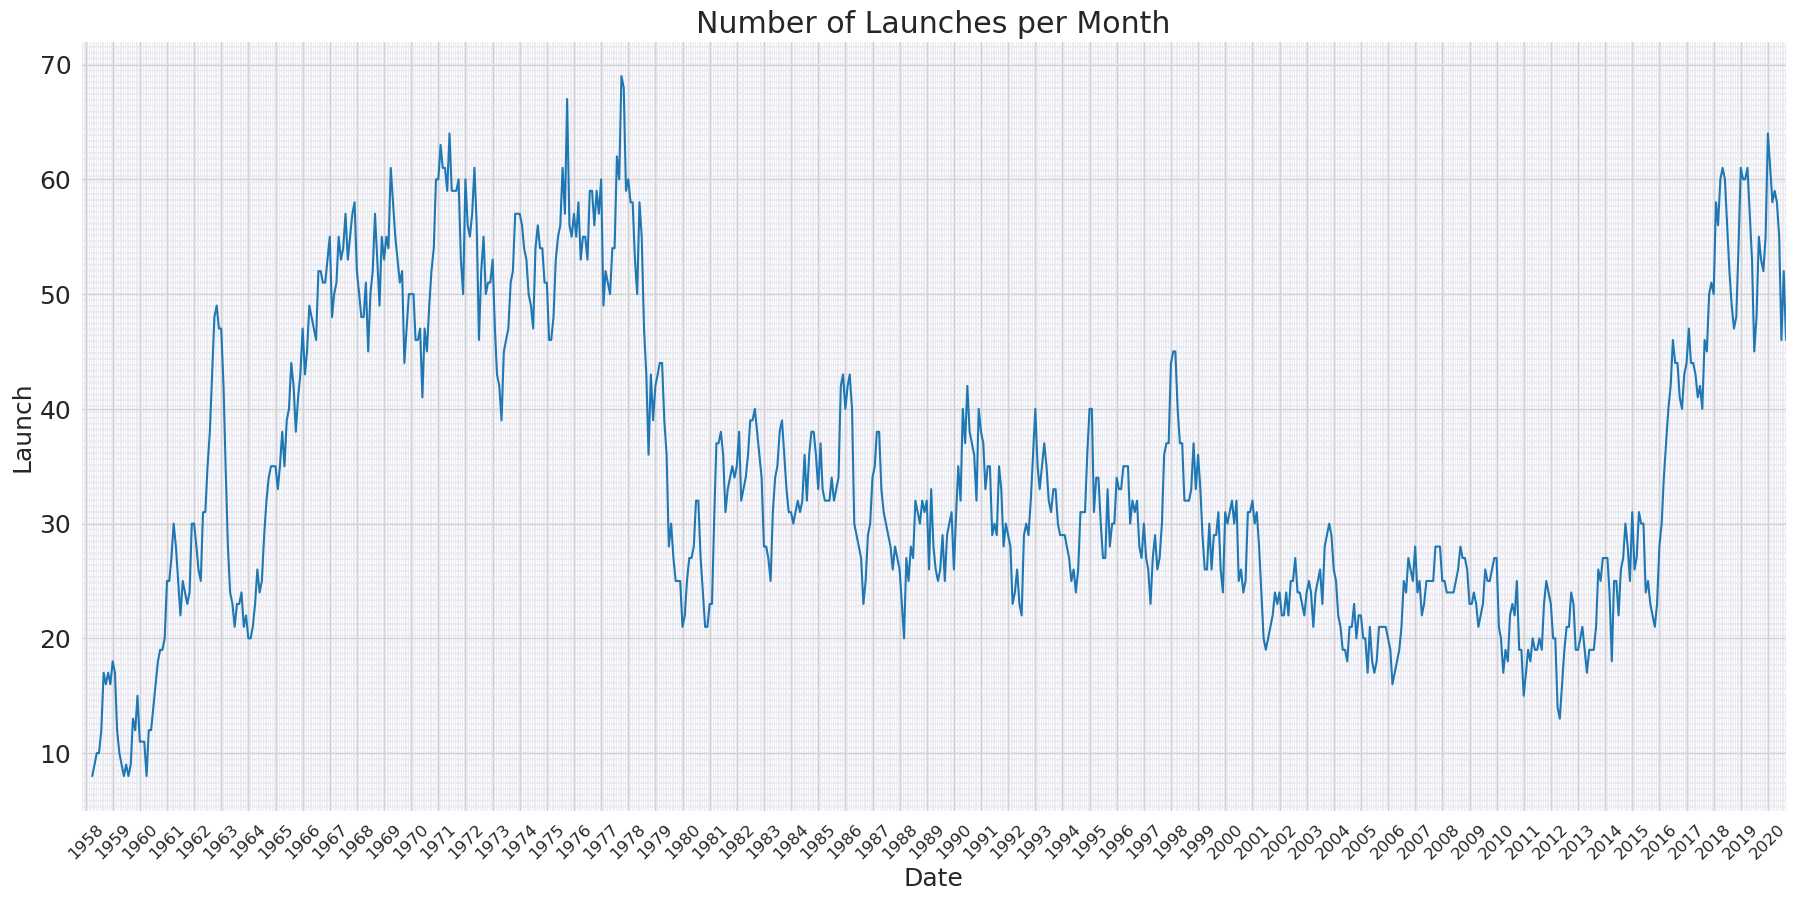

In [530]:
with sns.axes_style("dark"):
    fig, ax = plt.subplots(figsize=(22, 10))
    plt.xticks(fontsize=12, rotation=45)
    ax.set_xlim([roll_df.index.min(), roll_df.index.max()])
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.grid(which="major", linewidth = 1, c="lightgray")
    ax.grid(which="minor", linestyle="dashed")
    plt.title("Number of Launches per Month")
    sns.lineplot(
        x=roll_df.index,
        y=roll_df.Launch,
    )

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [531]:
df_launches_monthly.reset_index(inplace=True)

In [532]:
months = df_data.Date.apply(lambda x: x.strftime("%B"))
df_months = pd.merge(df_data, months, on=months.index)
df_months.rename(columns={"Date_x": "Date", "Date_y": "Month"}, inplace=True)
df_months.drop(columns=["key_0"], inplace=True)

In [533]:
month_counter = df_months.Month.value_counts()

In [534]:
print(f"Most Popular Month: {month_counter.idxmax()}")

Most Popular Month: December


In [535]:
print(f"Least Popular Month: {month_counter.idxmin()}")

Least Popular Month: January


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [536]:
df_year = df_data.copy()
df_year.dropna(inplace=True)
df_price_per_year = df_year.groupby("Year").agg({"Price": pd.Series.mean})

In [537]:
fig = px.line(
    df_price_per_year,
    y="Price",
    markers=True,
    title="Launch Price per Year",
    height=600,
    width=800
)
fig.update_xaxes(range=[1964, 2020])
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [538]:
org_launch_per_year = df_data.groupby(["Organisation", "Year"], as_index=False).agg({"Launch": pd.Series.sum})

Find Organisations with the Launches:

In [539]:
top_orgs = org_launch_per_year.groupby("Organisation", as_index=False).sum("Launch")
top_orgs = top_orgs.sort_values("Launch", ascending=False)[:10]

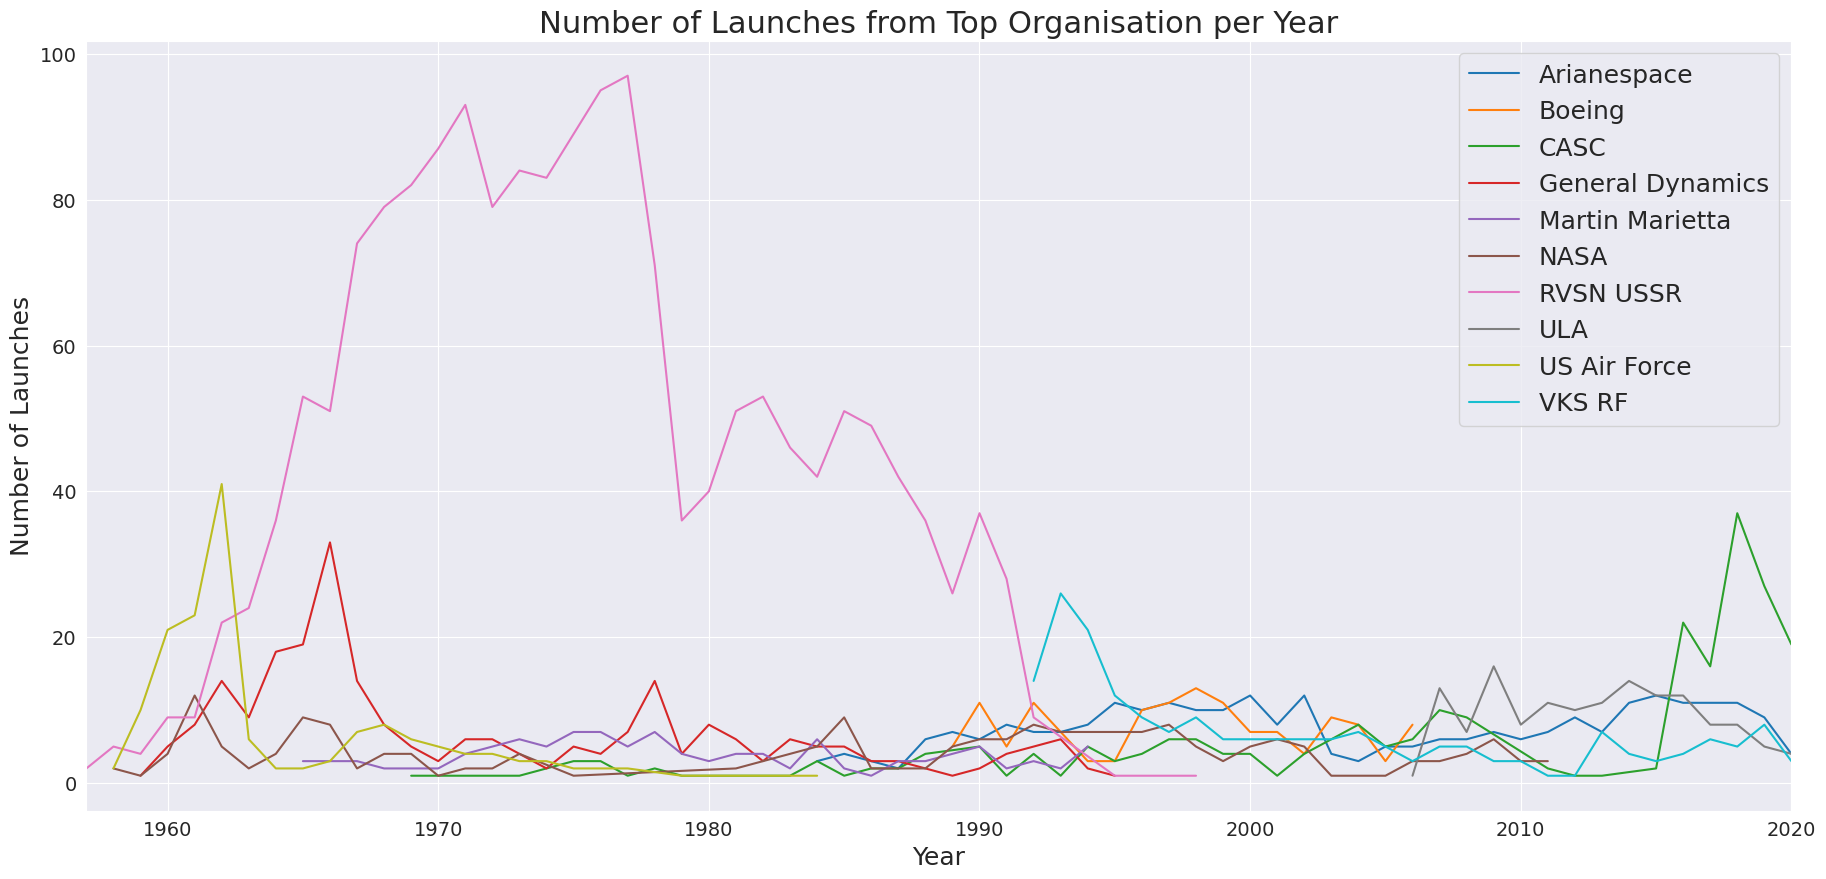

In [677]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(22, 10))
    ax.set_xlim([1957, 2020])
    sns.lineplot(x="Year", y="Launch", hue="Organisation", data=org_launch_per_year[org_launch_per_year.Organisation.isin(top_orgs.Organisation)])
    plt.title("Number of Launches from Top Organisation per Year", fontsize=22)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Number of Launches", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=18)



# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [619]:
cold_war = df_data.query("Year <= 1991")
cold_war = cold_war.query('Iso_code == "USA" or Iso_code == "RUS" or Iso_code=="KAZ"')

Change Country Names:

In [620]:
cold_war["Country"] = cold_war["Country"].replace(to_replace={"Russian Federation" :"USSR", "Kazakhstan": "USSR", "USA": "USA"})

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [622]:
cold_war_launches = cold_war.groupby("Country").size()

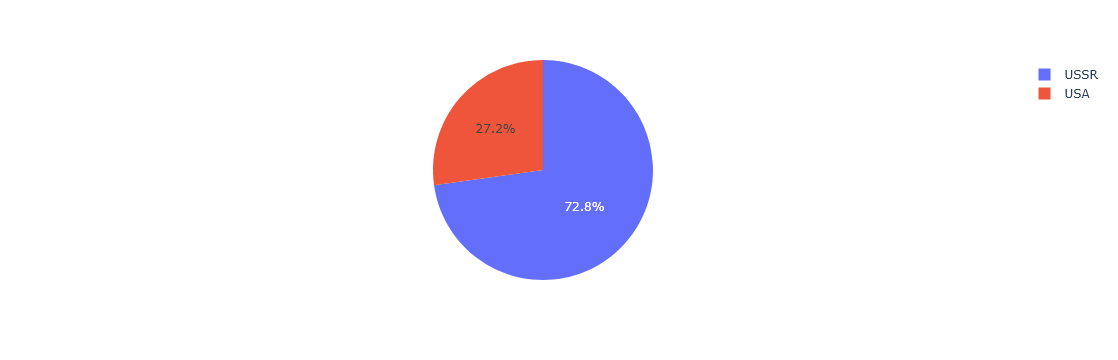

In [623]:
fig = px.pie(names=cold_war_launches.index, values=cold_war_launches.values)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [624]:
launches_during_cold_war = cold_war.groupby(["Year", "Country"], as_index=False).sum("Launch")

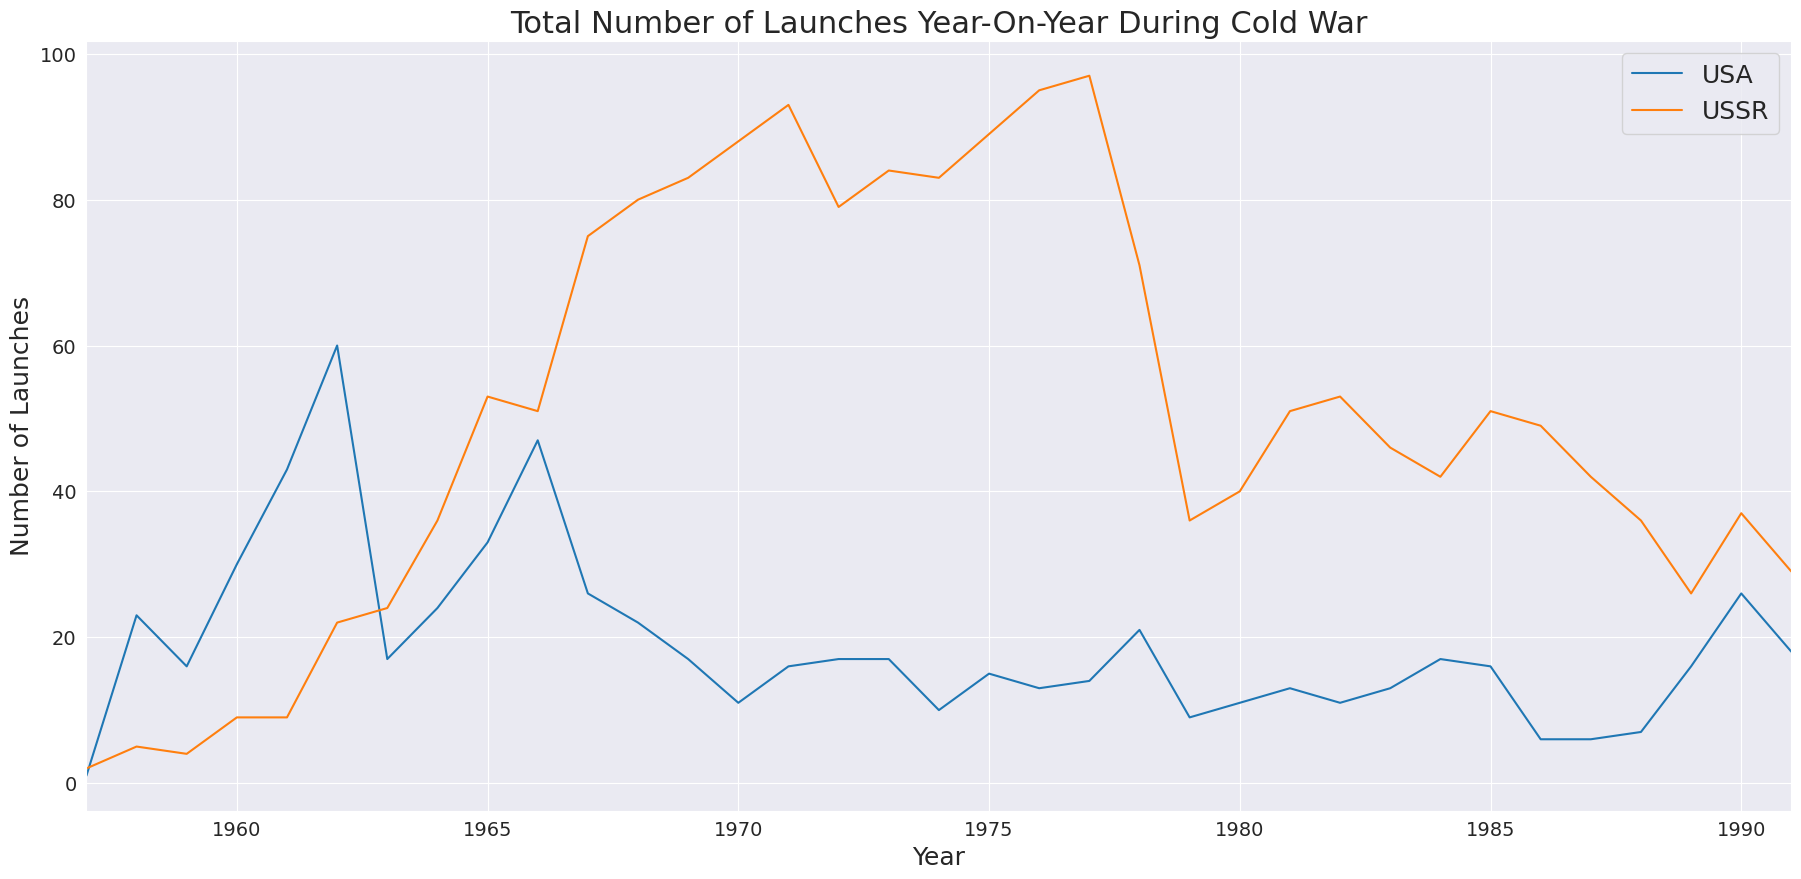

In [625]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(22, 10))
    ax.set_xlim([1957, 1991])
    sns.lineplot(x="Year", y="Launch", hue="Country", data= launches_during_cold_war)
    plt.title("Total Number of Launches Year-On-Year During Cold War", fontsize=22)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Number of Launches", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=18)


## Chart the Total Number of Mission Failures Year on Year.

Create column for the percentage of failures:

In [626]:
failures_during_cold_war = cold_war[cold_war.Mission_Status != "Success"].groupby(["Year", "Country"], as_index=False).sum("Launch")

Filling an empty value in data:

In [627]:
new_row = pd.DataFrame([{"Year": 1957, "Country": "USSR", "Price": 0, "Launch": 0}])
failures_during_cold_war = pd.concat([failures_during_cold_war.iloc[:0], new_row, failures_during_cold_war.iloc[0:]]).reset_index(drop=True)

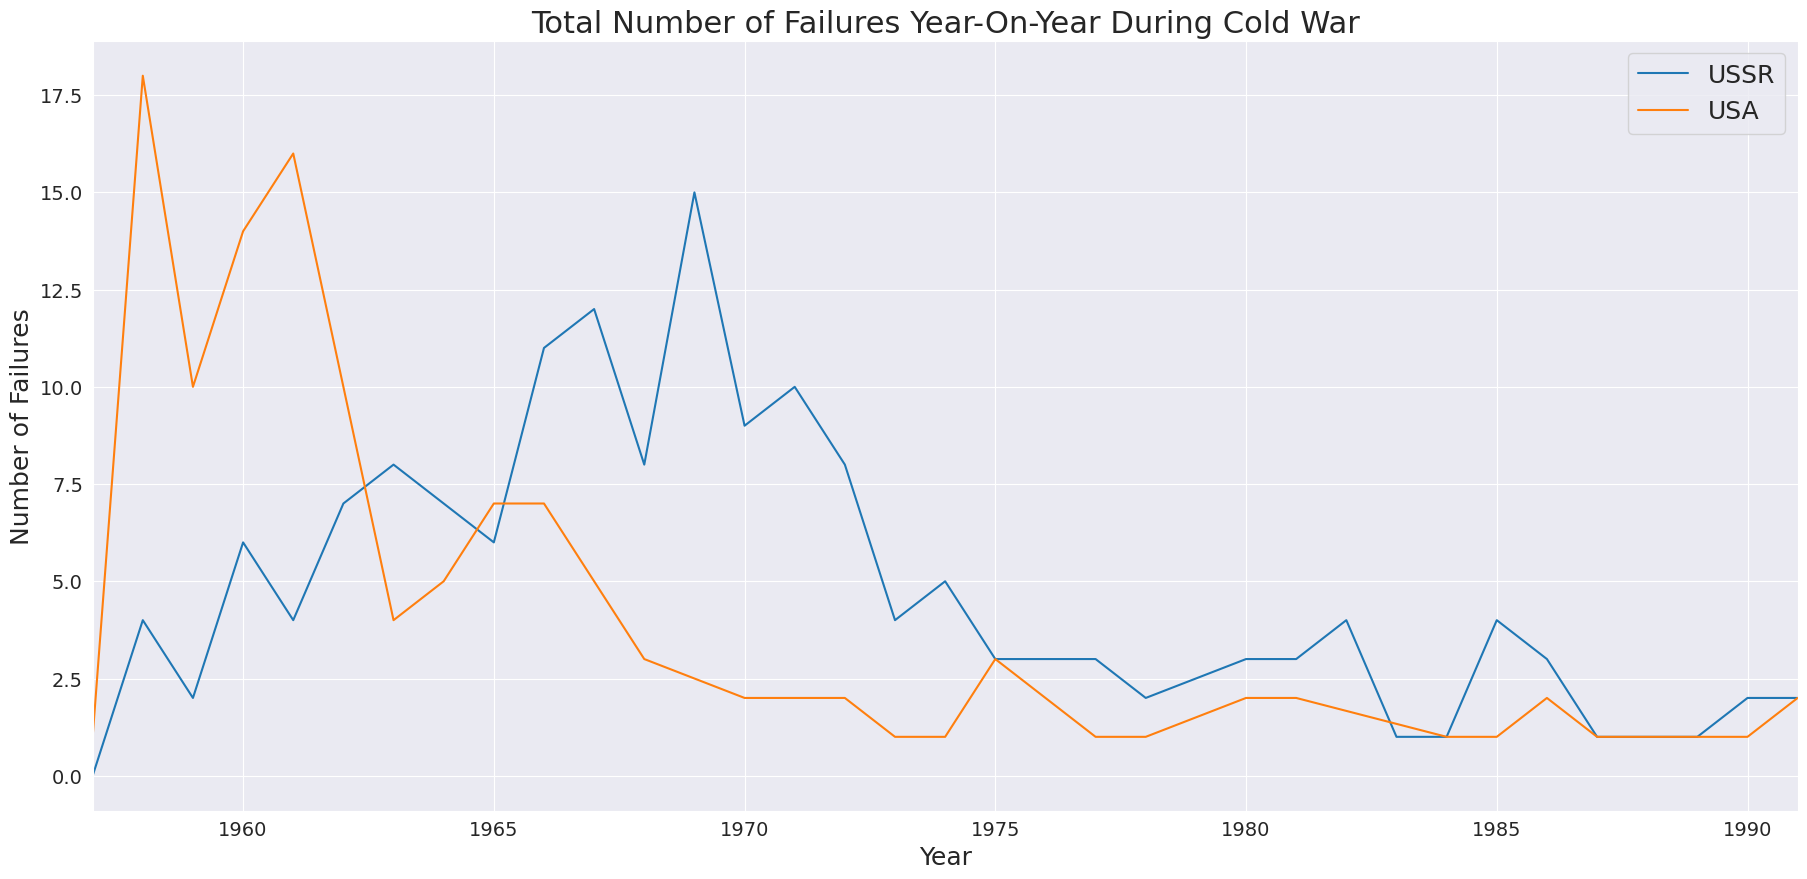

In [628]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(22, 10))
    ax.set_xlim([1957, 1991])
    sns.lineplot(x="Year", y="Launch", hue="Country", data=failures_during_cold_war)
    plt.title("Total Number of Failures Year-On-Year During Cold War", fontsize=22)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Number of Failures", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=18)


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [633]:
failures_percent = round(failures_during_cold_war.Launch.div(launches_during_cold_war.Launch, fill_value=0) * 100)

In [634]:
launches_during_cold_war["Failures_Percentage"] = failures_percent

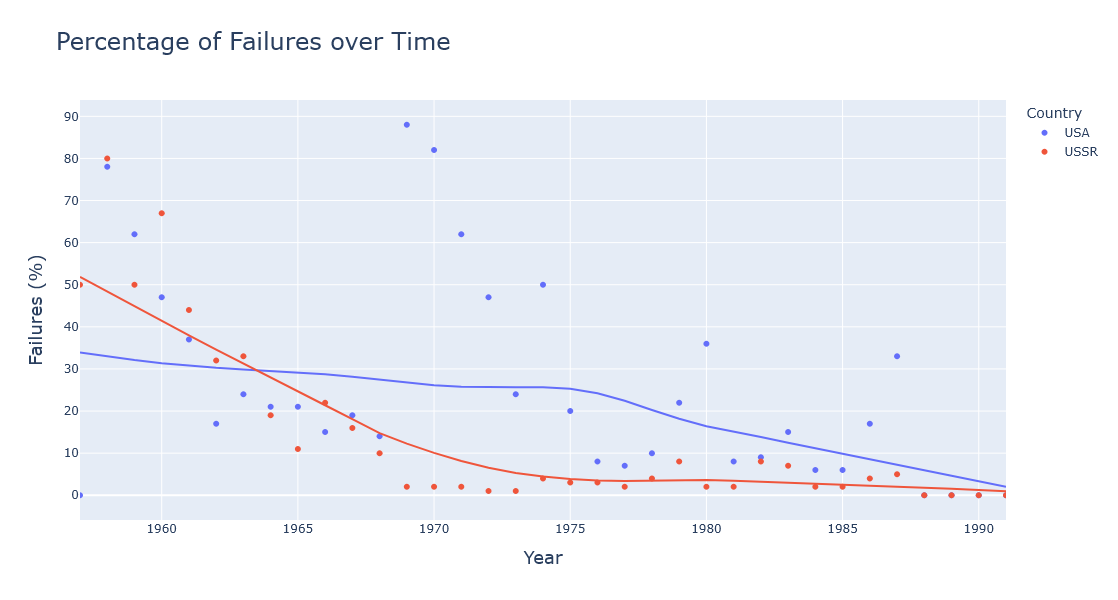

In [655]:
fig = px.scatter(
    launches_during_cold_war,
    height=600,
    width=1100,
    title="Percentage of Failures over Time",
    x="Year",
    y="Failures_Percentage",
    color="Country",
    trendline="lowess"
)

fig.update_xaxes(range=[1957, 1991])
fig.update_layout(
    title_font_size=24,
    yaxis_title = "Failures (%)",
    yaxis_title_font_size = 18,
    xaxis_title = "Year",
    xaxis_title_font_size = 18,
)
fig.show()

In [ ]:
usa_failure_rate = (usa_failure / usa_launches) * 100
usa_failure_rate.fillna(value=0, inplace=True)

ussr_failure_rate = (ussr_failure / ussr_launches) * 100
ussr_failure_rate.fillna(value=0, inplace=True)

In [ ]:
plt.figure(figsize=(10,8), dpi=120)
plt.title("Percentage of Failures over Time")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Failures', fontsize=14)
plt.xlim(1957, 1991)

plt.plot(ussr_failure_rate, label="URSS", c="r")
plt.plot(usa_failure_rate, label="USA", c="b")
plt.legend(fontsize=16, loc="upper right") 
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [656]:
launches_per_year_per_country = df_data.groupby(["Year","Country"]).size().reset_index(name="total_launches")
launches_per_year_per_country["launches_sum"] = launches_per_year_per_country.groupby("Country")["total_launches"].cumsum()

In [657]:
leading_countries = launches_per_year_per_country.loc[launches_per_year_per_country.groupby("Year").launches_sum.idxmax()][["Year", "Country", "total_launches"]]

In [658]:
print("Leading Country Each Year:")
for country in leading_countries.values:
    print(f"{country[0]}: {country[1]}")

Leading Country Each Year:
1957: Kazakhstan
1958: USA
1959: USA
1960: USA
1961: USA
1962: USA
1963: USA
1964: USA
1965: USA
1966: USA
1967: USA
1968: USA
1969: USA
1970: USA
1971: USA
1972: USA
1973: USA
1974: Russian Federation
1975: Russian Federation
1976: Russian Federation
1977: Russian Federation
1978: Russian Federation
1979: Russian Federation
1980: Russian Federation
1981: Russian Federation
1982: Russian Federation
1983: Russian Federation
1984: Russian Federation
1985: Russian Federation
1986: Russian Federation
1987: Russian Federation
1988: Russian Federation
1989: Russian Federation
1990: Russian Federation
1991: Russian Federation
1992: Russian Federation
1993: Russian Federation
1994: Russian Federation
1995: Russian Federation
1996: Russian Federation
1997: Russian Federation
1998: Russian Federation
1999: Russian Federation
2000: Russian Federation
2001: Russian Federation
2002: Russian Federation
2003: Russian Federation
2004: Russian Federation
2005: Russian Federat

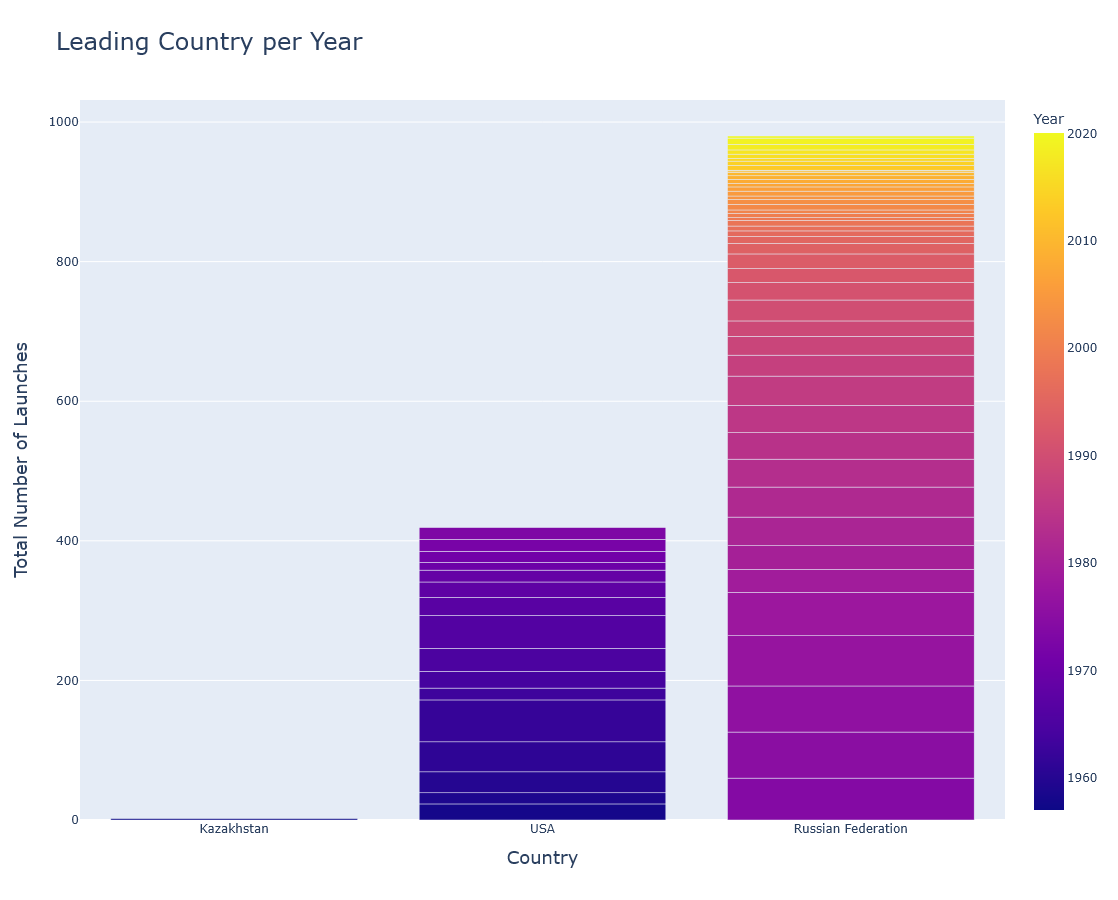

In [659]:
fig = px.bar(
       leading_countries, 
       x="Country", 
       y="total_launches", 
       color="Year",
       height=900,
       width=1000,
       title="Leading Country per Year"
      )
fig.update_layout(
    title_font_size=24,
    xaxis_title = "Country",
    xaxis_title_font_size = 18,
    yaxis_title = "Total Number of Launches",
    yaxis_title_font_size = 18,
)


In [660]:
leading_countries_per_year = launches_per_year_per_country.query("Country == 'Kazakhstan' or Country == 'USA' or Country == 'Russian Federation'")

In [661]:
pivot_leading_countries = leading_countries_per_year.pivot(index="Year", columns="Country", values="launches_sum")

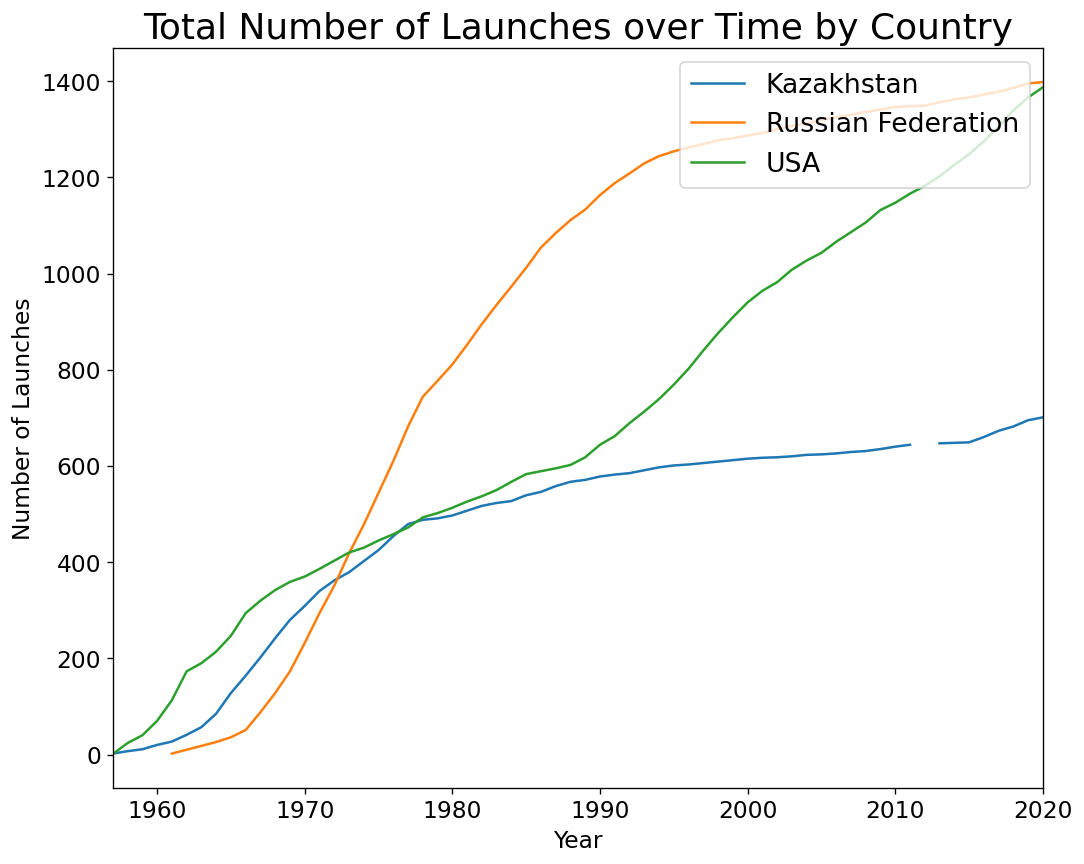

In [667]:
plt.figure(figsize=(10,8), dpi=120)
plt.title("Total Number of Launches over Time by Country")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xlim(1957, 2020)
for column in pivot_leading_countries.columns:
    plt.plot(pivot_leading_countries.index, pivot_leading_countries[column],  label=pivot_leading_countries[column].name)
plt.legend(fontsize=16, loc="upper right") 

plt.show()

In [663]:
success_per_year_per_country = df_data.query("Mission_Status == 'Success'").groupby(["Year","Country"]).size().reset_index(name="total_launches")
success_per_year_per_country["launches_sum"] = success_per_year_per_country.groupby("Country")["total_launches"].cumsum()

In [664]:
leading_countries_success = success_per_year_per_country.loc[success_per_year_per_country.groupby("Year").launches_sum.idxmax()][["Year", "Country", "total_launches"]]

In [665]:
top_countries_by_year = success_per_year_per_country.pivot(index="Year", columns="Country", values="launches_sum")[leading_countries_success.value_counts("Country").index]

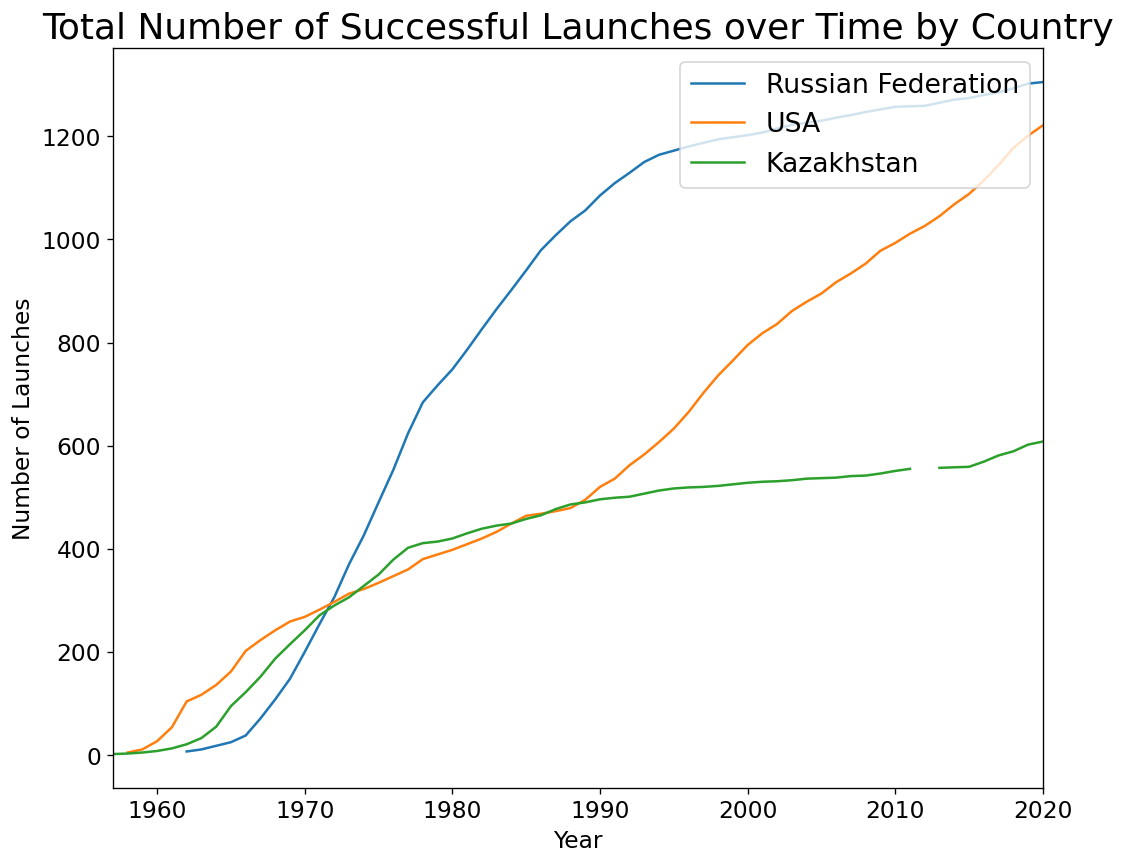

In [675]:
plt.figure(figsize=(10,8), dpi=120)
plt.title("Total Number of Successful Launches over Time by Country")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xlim(1957, 2020)
for column in top_countries_by_year.columns:
    plt.plot(top_countries_by_year.index, top_countries_by_year[column],  label=top_countries_by_year[column].name)
plt.legend(fontsize=16, loc="upper right") 

plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [684]:
launches_per_org_per_year = df_data.groupby(["Organisation", "Year"], as_index=False).agg({"Launch": pd.Series.sum})

In [690]:
leading_org = launches_per_org_per_year.loc[launches_per_org_per_year.groupby("Year")["Launch"].idxmax()]

In [691]:
print("Leading Organisation Each Year:")
for org in leading_org.values:
    print(f"{org[1]}: {org[0]}")

Leading Organisation Each Year:
1957: RVSN USSR
1958: US Navy
1959: US Air Force
1960: US Air Force
1961: US Air Force
1962: US Air Force
1963: RVSN USSR
1964: RVSN USSR
1965: RVSN USSR
1966: RVSN USSR
1967: RVSN USSR
1968: RVSN USSR
1969: RVSN USSR
1970: RVSN USSR
1971: RVSN USSR
1972: RVSN USSR
1973: RVSN USSR
1974: RVSN USSR
1975: RVSN USSR
1976: RVSN USSR
1977: RVSN USSR
1978: RVSN USSR
1979: RVSN USSR
1980: RVSN USSR
1981: RVSN USSR
1982: RVSN USSR
1983: RVSN USSR
1984: RVSN USSR
1985: RVSN USSR
1986: RVSN USSR
1987: RVSN USSR
1988: RVSN USSR
1989: RVSN USSR
1990: RVSN USSR
1991: RVSN USSR
1992: VKS RF
1993: VKS RF
1994: VKS RF
1995: Lockheed
1996: Arianespace
1997: Arianespace
1998: Boeing
1999: Boeing
2000: Arianespace
2001: Arianespace
2002: Arianespace
2003: Boeing
2004: Boeing
2005: Arianespace
2006: Boeing
2007: ULA
2008: CASC
2009: ULA
2010: ULA
2011: ULA
2012: ULA
2013: ULA
2014: ULA
2015: Arianespace
2016: CASC
2017: SpaceX
2018: CASC
2019: CASC
2020: CASC


Find leading organisation year-by-year:

In [702]:
top_orgs_yearly = launches_per_org_per_year[launches_per_org_per_year.Organisation.isin(leading_org.Organisation.unique())]

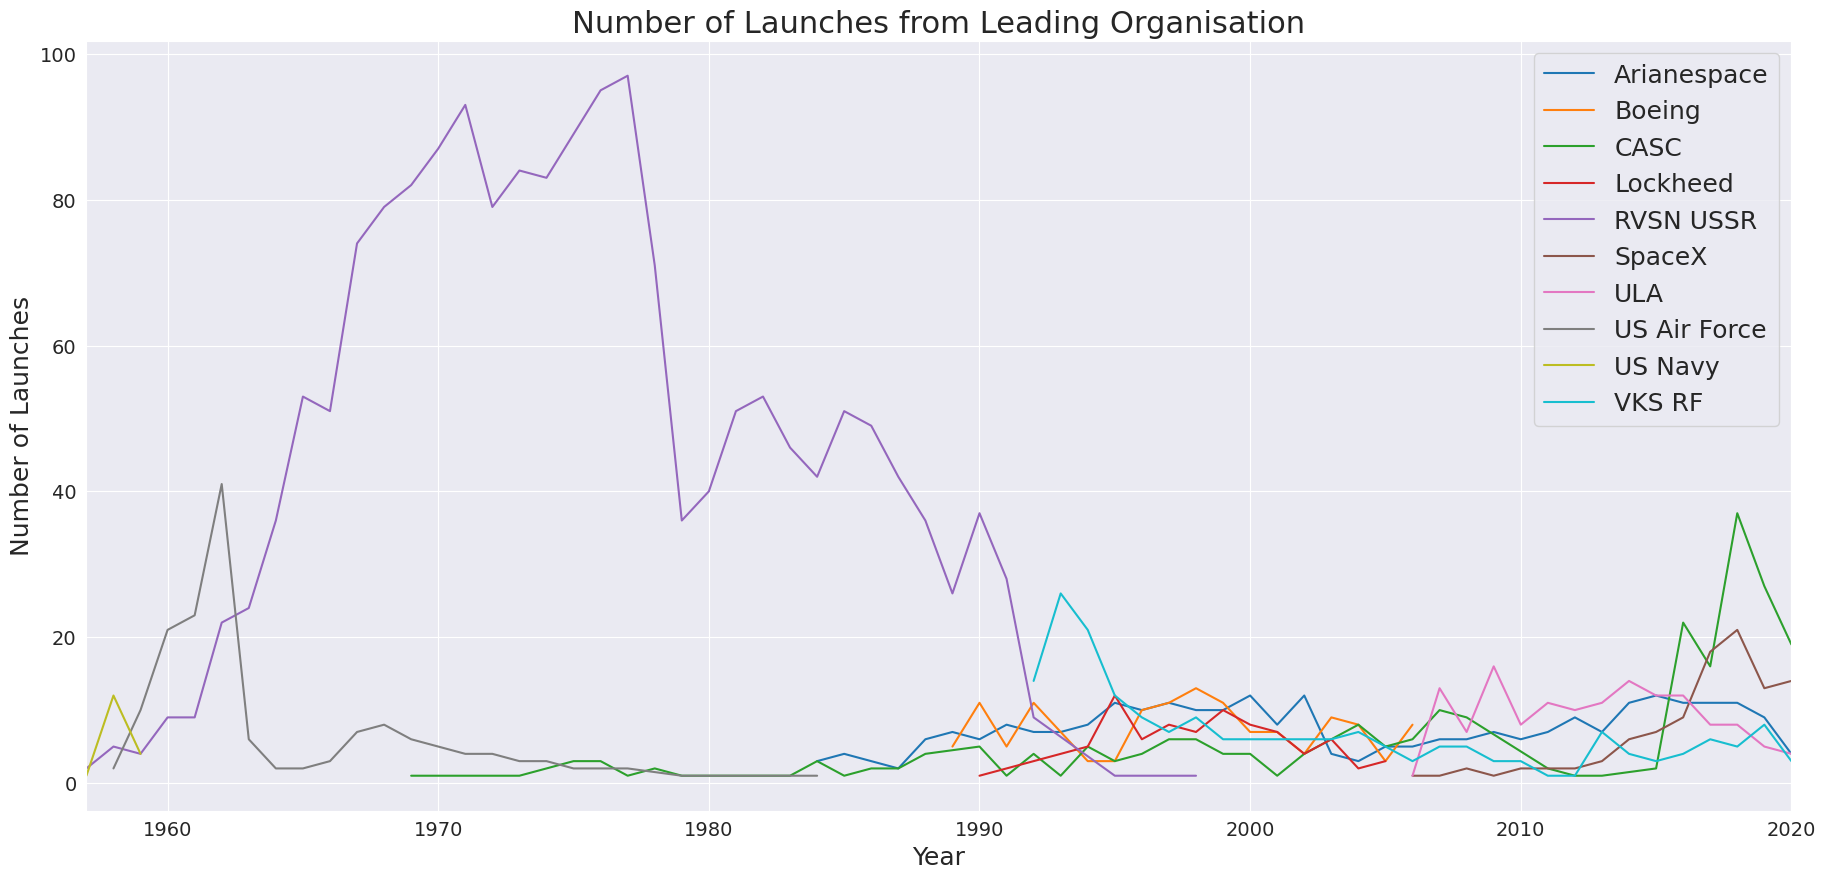

In [706]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(22, 10))
    ax.set_xlim([1957, 2020])
    sns.lineplot(x="Year", y="Launch", hue="Organisation", data=top_orgs_yearly)
    plt.title("Number of Launches from Leading Organisation", fontsize=22)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Number of Launches", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=18)